In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
sample_json_df = pd.read_json('/Users/lacivert/2014_2017.json')

In [3]:
#assign DataFrame
df = pd.DataFrame(sample_json_df)

In [5]:
#list column names
list(df.columns.values)

['1 mo', '1 yr', '10 yr', '30 yr', '6 mo']

In [6]:
df.head()

,1 mo,1 yr,10 yr,30 yr,6 mo
0,0.02,0.13,3.01,3.93,0.10
1,0.01,0.12,2.98,3.90,0.08
2,0.01,0.13,2.96,3.88,0.08
3,0.00,0.13,3.01,3.90,0.08
4,0.01,0.13,2.97,3.88,0.06


In [7]:
df.tail(10)

,1 mo,1 yr,10 yr,30 yr,6 mo
990,1.24,1.71,2.35,2.68,1.48
991,1.26,1.70,2.39,2.74,1.51
992,1.25,1.71,2.46,2.82,1.51
993,1.22,1.72,2.49,2.88,1.51
994,1.21,1.73,2.48,2.84,1.54
995,1.15,1.73,2.48,2.83,1.54
996,1.24,1.75,2.47,2.82,1.52
997,1.18,1.75,2.42,2.75,1.53
998,1.19,1.76,2.43,2.75,1.54
999,1.28,1.76,2.40,2.74,1.53


In [8]:
df.describe()

,1 mo,1 yr,10 yr,30 yr,6 mo
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,0.292460,0.565450,2.210330,2.91582,0.440970
std,0.355624,0.435607,0.325434,0.35186,0.418463
min,0.000000,0.090000,1.370000,2.11000,0.030000
25%,0.020000,0.200000,1.990000,2.69000,0.080000
50%,0.170000,0.510000,2.260000,2.90000,0.370000
75%,0.460000,0.820000,2.420000,3.09000,0.630000
max,1.300000,1.760000,3.010000,3.93000,1.540000


Text(0,0.5,'Yield Curve Rates')

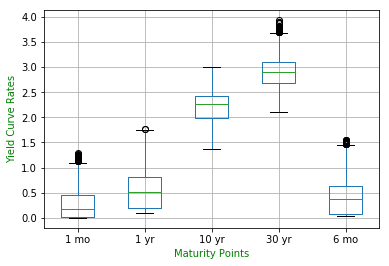

In [25]:
df.boxplot()
plt.xlabel('Maturity Points',color='green')
plt.ylabel('Yield Curve Rates',color='green')

In [10]:
#Difference between max and min with runtime function
df.apply (lambda a: a.max() - a.min())

1 mo     1.30
1 yr     1.67
10 yr    1.64
30 yr    1.82
6 mo     1.51
dtype: float64

In [11]:
#Difference between quantiles with runtime function
df.apply (lambda b: b.quantile(q=0.75) - b.quantile(q=0.25))

1 mo     0.44
1 yr     0.62
10 yr    0.43
30 yr    0.40
6 mo     0.55
dtype: float64

In [4]:
one_month, six_month, one_year, ten_year, thirty_year  = df.loc[:,'1 mo'], df.loc[:,'6 mo'], df.loc[:,'1 yr'], df.loc[:,'10 yr'], df.loc[:,'30 yr']

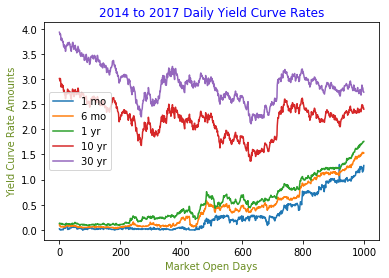

In [16]:
plt.plot(one_month)
plt.plot(six_month)
plt.plot(one_year)
plt.plot(ten_year)
plt.plot(thirty_year)
plt.xlabel('Market Open Days',color='olivedrab')
plt.title('2014 to 2017 Daily Yield Curve Rates', color='blue')
plt.ylabel('Yield Curve Rate Amounts', color='olivedrab')
plt.legend()

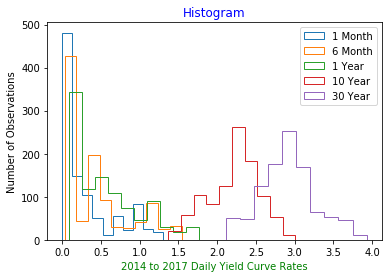

In [6]:
plt.hist(one_month, histtype='step', label='1 Month')
plt.hist(six_month, histtype='step',label='6 Month')
plt.hist(one_year, histtype='step',label='1 Year')
plt.hist(ten_year, histtype='step',label='10 Year')
plt.hist(thirty_year, histtype='step',label='30 Year')
plt.title('Histogram',color='blue')
plt.xlabel('2014 to 2017 Daily Yield Curve Rates',color='green')
plt.ylabel('Number of Observations')
plt.legend()

In [7]:
#VAR(X) = COV(X,X)
np.cov(one_month, one_month)

array([[0.12646862, 0.12646862],
       [0.12646862, 0.12646862]])

In [8]:
np.var(one_month)

0.12634214840000002

In [9]:
#assigning covariances to short maturity cluster
j, k, l = np.cov(one_month,six_month), np.cov(one_month,one_year), np.cov(six_month,one_year)

In [10]:
#assigning covariance to longer maturity cluster
m = np.cov(ten_year,thirty_year)

In [11]:
#all maturity vectors that vary differently, i.e. not clustering
t, u, v, w, x, y = np.cov(one_month, ten_year), np.cov(one_month, thirty_year), np.cov(six_month, ten_year), np.cov(six_month, thirty_year), np.cov(one_year, ten_year), np.cov(one_year, thirty_year)

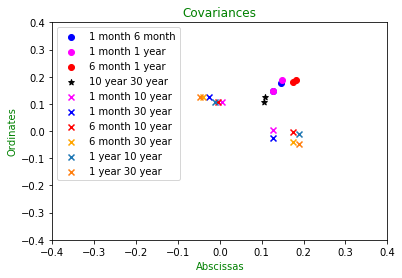

In [21]:
plt.scatter(j[:1], j[-1:],label='1 month 6 month', color='blue')
plt.scatter(k[:1], k[-1:],label='1 month 1 year', color='magenta')
plt.scatter(l[:1], l[-1:],label='6 month 1 year', color='red')
plt.scatter(m[:1],m[-1:], label='10 year 30 year', color= 'black',marker='*')
plt.scatter(t[:1],t[-1:], label = '1 month 10 year', color='magenta', marker='x')
plt.scatter(u[:1],u[-1:], label = '1 month 30 year', color='blue', marker='x')
plt.scatter(v[:1],v[-1:], label = '6 month 10 year', color='red', marker='x')
plt.scatter(w[:1],w[-1:], label = '6 month 30 year', color='orange', marker='x')
plt.scatter(x[:1],x[-1:], label = '1 year 10 year', marker='x')
plt.scatter(y[:1],y[-1:], label='1 year 30 year', marker = 'x')
plt.title('Covariances',color='green')
plt.axis([-0.40,0.40,-0.40,0.40])
plt.xlabel('Abscissas', color='green')
plt.ylabel('Ordinates', color='green')
plt.legend()

In [12]:
#covariances short maturity cluster
j,k,l

(array([[0.12646862, 0.14589971],
        [0.14589971, 0.17511147]]), array([[0.12646862, 0.1492096 ],
        [0.1492096 , 0.18975375]]), array([[0.17511147, 0.18083495],
        [0.18083495, 0.18975375]]))

In [13]:
#covariances longer maturity cluster
m

array([[0.1059071 , 0.10758246],
       [0.10758246, 0.12380533]])

In [14]:
#covariances of non - clustering maturity vectors
t, u, v, w, x, y

(array([[0.12646862, 0.00477957],
        [0.00477957, 0.1059071 ]]), array([[ 0.12646862, -0.02493966],
        [-0.02493966,  0.12380533]]), array([[ 0.17511147, -0.00475147],
        [-0.00475147,  0.1059071 ]]), array([[ 0.17511147, -0.03911346],
        [-0.03911346,  0.12380533]]), array([[ 0.18975375, -0.01052632],
        [-0.01052632,  0.1059071 ]]), array([[ 0.18975375, -0.04733626],
        [-0.04733626,  0.12380533]]))